In [3]:
# load necessary libraries
library(DBI)
library(caret)
library(gridExtra)
library(ggpubr)
library(reshape2)
library(ggplot2) 
library(forecast)

## Turn Off warnings
options( warn = -1 )

# process in parallel on Windows
#library(doParallel) 
#cl <- makeCluster(detectCores(), type='PSOCK')
#registerDoParallel(cl)

# For MAC OSX and Unix like System
library(doMC)
registerDoMC(cores = 4)

Loading required package: lattice
Loading required package: ggplot2
Loading required package: magrittr

Attaching package: ‘forecast’

The following object is masked from ‘package:ggpubr’:

    gghistogram

Loading required package: foreach
Loading required package: iterators
Loading required package: parallel


In [4]:
# Load the DataSets: Titanic training Data
dataSet <- read.csv("international-airline-passengers.csv", header = TRUE, sep = ',')
colnames(dataSet)

[1] "Month"     "Passenger"

Month,Passenger
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
1949-06,135
1949-07,148
1949-08,148
1949-09,136
1949-10,119


,Month,Passenger
135,1960-03,419
136,1960-04,461
137,1960-05,472
138,1960-06,535
139,1960-07,622
140,1960-08,606
141,1960-09,508
142,1960-10,461
143,1960-11,390
144,1960-12,432


[1] 144   2


 factor integer 
      1       1 

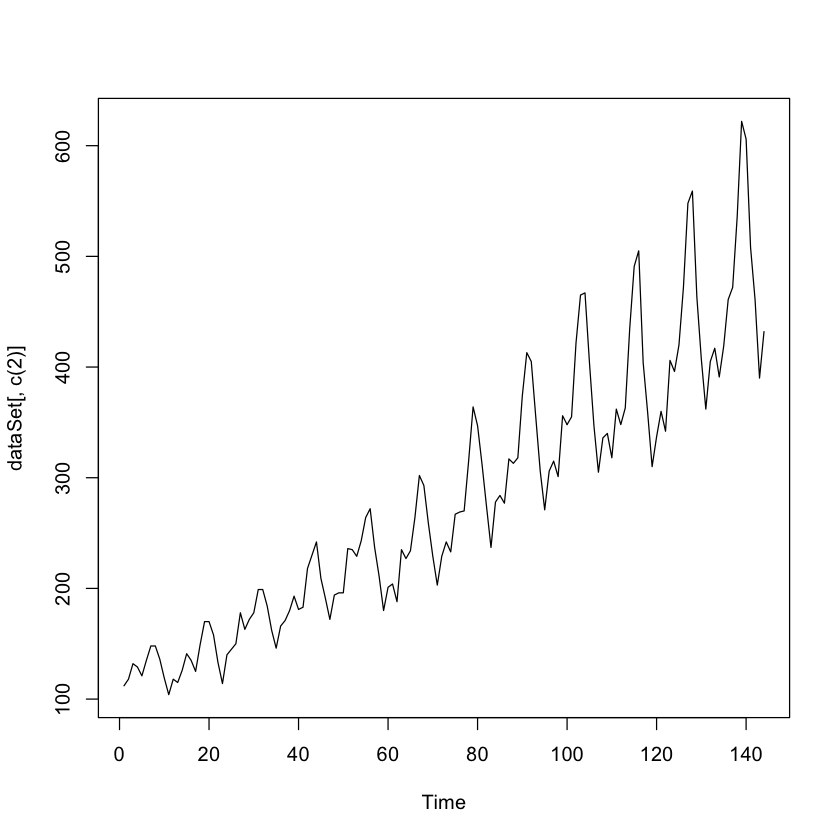

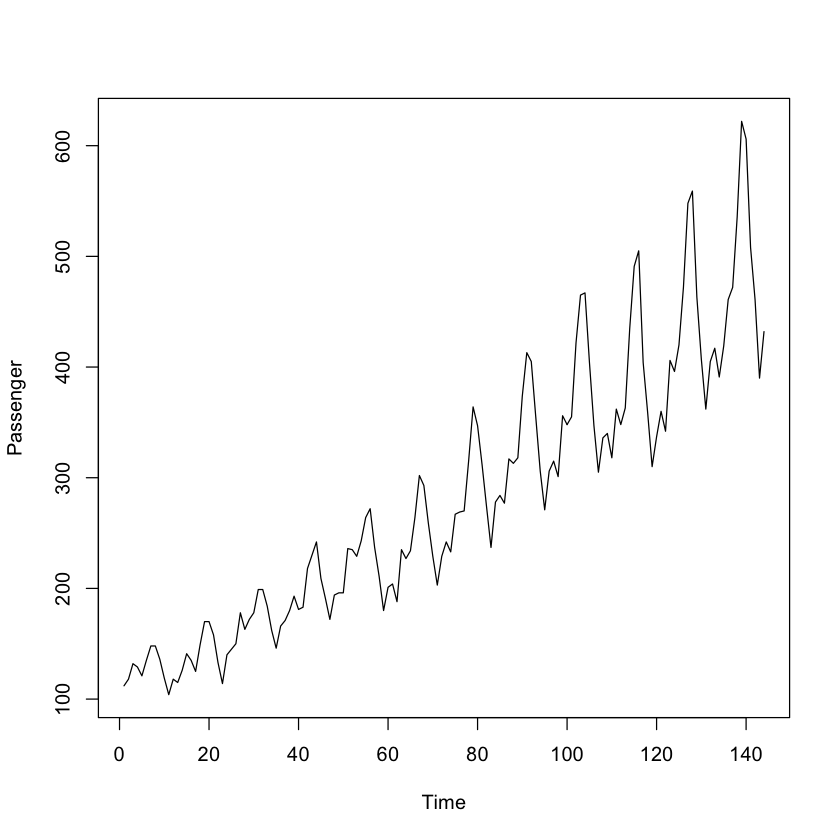

In [5]:
# Print top 10 rows in the dataSet
head(dataSet, 10)
# Print last 10 rows in the dataSet
tail(dataSet, 10)
# Dimention of Dataset
dim(dataSet)
# Check Data types of each column
table(unlist(lapply(dataSet, class)))

plot.ts(dataSet[, c(2)])
plot.ts(dataSet["Passenger"])

In [6]:
# Covert the dataset to a vactor i.e. creating "y" variable
dataSet  <- as.numeric(dataSet[, c("Passenger")])


	Ljung-Box test

data:  Residuals from ARIMA(1,1,0)
Q* = 33.176, df = 9, p-value = 0.0001244

Model df: 1.   Total lags used: 10

[1] 0.9312167


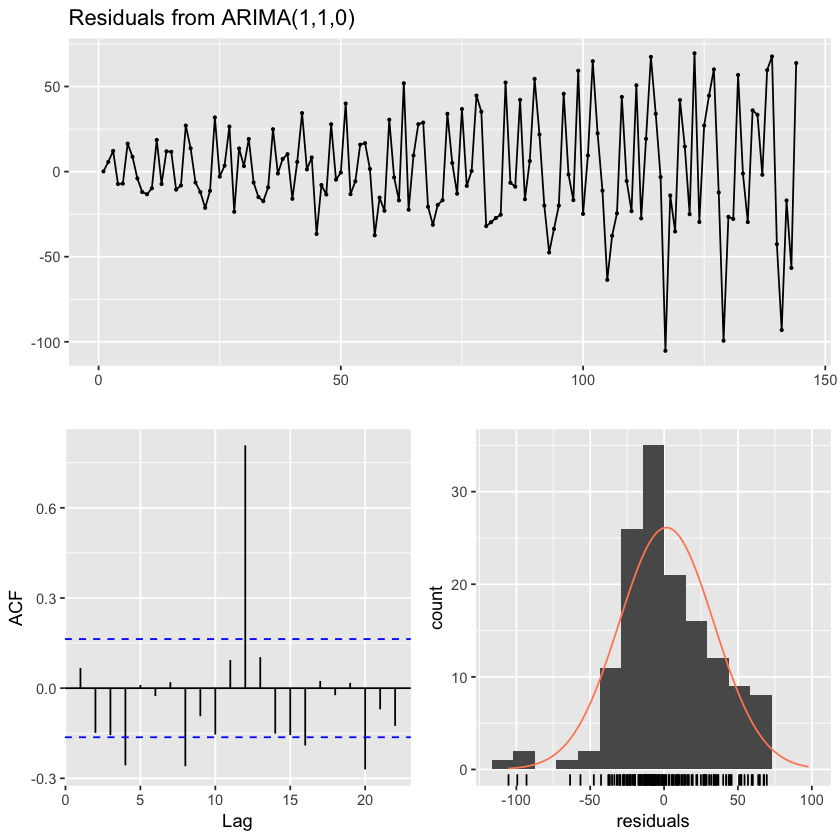

    Point Forecast    Lo 80    Hi 80      Lo 95    Hi 95
145       444.8751 403.7596 485.9905 381.994381 507.7558
146       448.8219 381.1739 516.4699 345.363186 552.2807
147       450.0318 361.1945 538.8692 314.166845 585.8968
148       450.4027 343.8865 556.9189 287.500281 613.3052
149       450.5164 328.6881 572.3447 264.196155 636.8367
150       450.5513 315.0827 586.0198 243.369968 657.7326
151       450.5620 302.6925 598.4314 224.415094 676.7088
152       450.5652 291.2534 609.8771 206.918737 694.2117
153       450.5662 280.5793 620.5531 190.593709 710.5388
154       450.5665 270.5362 630.5969 175.233858 725.8992
155       450.5666 261.0241 640.1091 160.686414 740.4469
156       450.5667 251.9671 649.1662 146.834833 754.2985
157       450.5667 243.3054 657.8279 133.587944 767.5454
158       450.5667 234.9915 666.1419 120.872867 780.2605
159       450.5667 226.9865 674.1469 108.630278 792.5031
160       450.5667 219.2584 681.8750  96.811120 804.3222
161       450.5667 211.7802 689

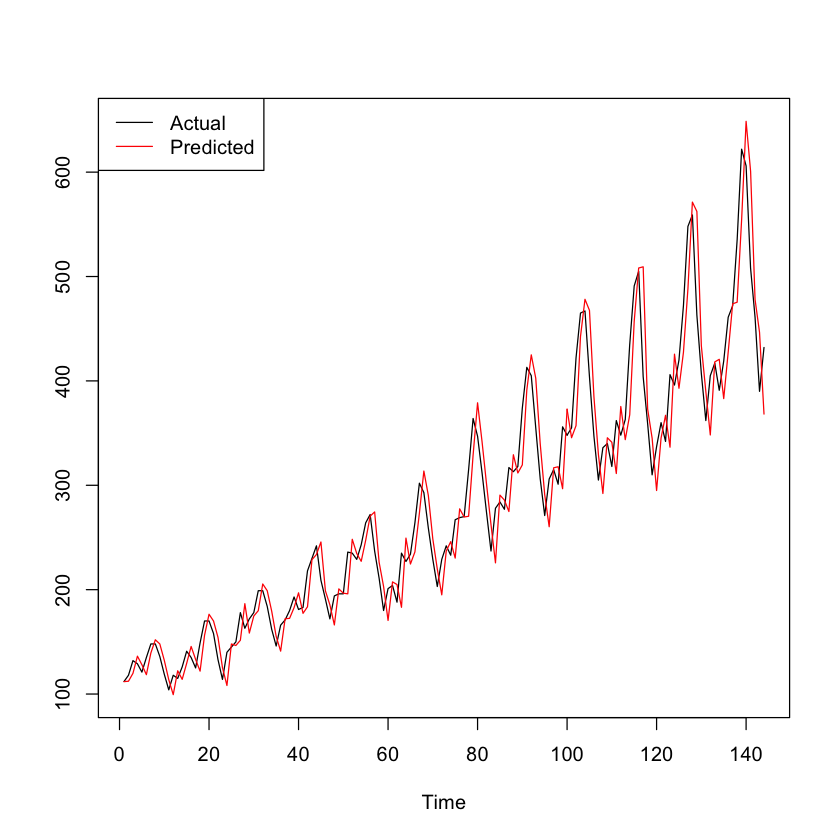

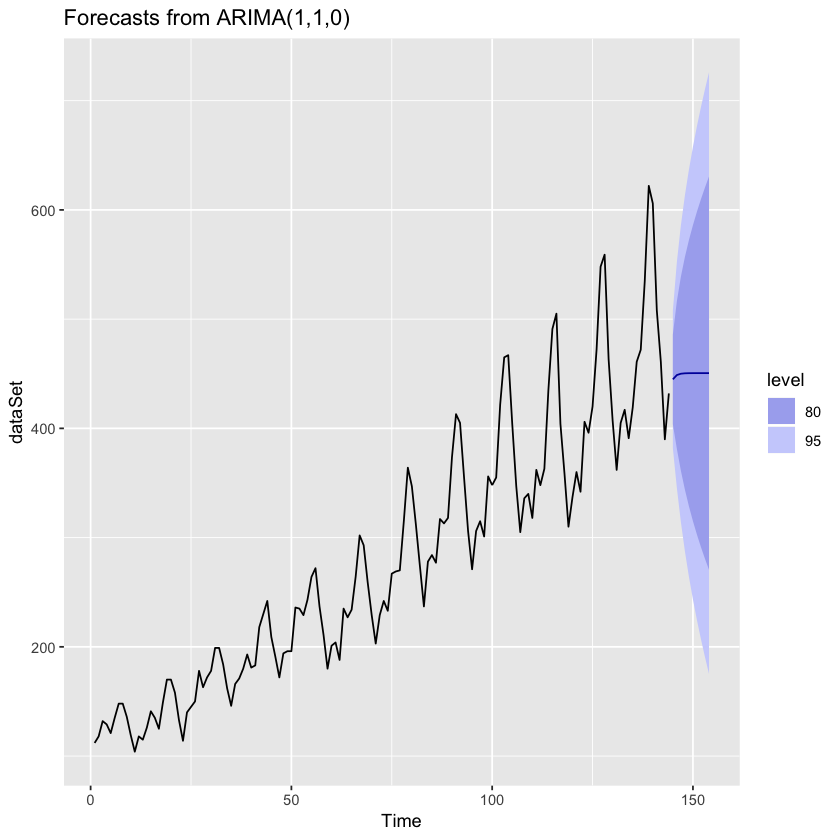

In [7]:
# ARIMA Model 
fit_arima  <- arima(dataSet,  order = c(1,1,0)); checkresiduals(fit_arima) 

# Calculate R squared value : r2
r2 <- cor(fitted(fit_arima),  dataSet)^2;  print(r2)

x <- dataSet            # actual
y <- fitted(fit_arima)  # predicted
# plot actual vs predicted
ts.plot(x, y, 
        gpars = list(col = c("black", "red")))
legend("topleft", legend = c("Actual", "Predicted"), col = c("black", "red"), lty = 1)

# Plotting Observed and Predicted with CI
forecast <- forecast:::forecast.Arima(fit_arima, h = 25)
print(forecast); autoplot(forecast(fit_arima))